In [2]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [12]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=10.78s)


# Stats about the Dataset

In [13]:
# print stats about the given dataset
print('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
142210 expressions for 50000 refs in 19994 images.

Among them:
42404 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [21959] (ann_id [1722180])
1. very bottom center back of head with tan collar
2. the head in the center
3. mans head center left of blue flag
[310.52, 461.81, 297.71, 450.42, 289.17, 419.82, 292.01, 414.84, 297.71, 370.01, 314.79, 341.54, 338.98, 330.86, 368.16, 337.98, 385.95, 345.1, 401.61, 370.72, 404.45, 402.03, 398.76, 411.28, 405.17, 414.84, 402.32, 444.73, 398.76, 444.73, 417.26, 456.83, 420.11, 478.89, 400.9, 478.89, 298.42, 480.0, 293.44, 470.35, 306.25, 463.94]


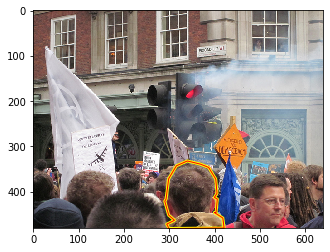

In [14]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. very bottom center back of head with tan collar
2. the head in the center
3. mans head center left of blue flag


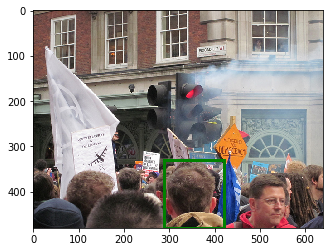

In [15]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [17]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[62447]: very bottom center back of head with tan collar
sent_id[62448]: the head in the center
sent_id[62449]: mans head center left of blue flag
